<a href="https://colab.research.google.com/github/ergosumdre/Susie/blob/main/Nice_SusieModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries
!pip install -q diffusers transformers accelerate safetensors insightface onnxruntime-gpu

# Download the specific "Realistic Vision" model weights
!wget -q https://huggingface.co/SG161222/Realistic_Vision_V5.1_noVAE/resolve/main/Realistic_Vision_V5.1_noVAE.safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 35.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.5/300.5 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.6 MB/s eta 0:00:00


In [3]:
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from insightface.app import FaceAnalysis
import cv2
import numpy as np
from PIL import Image

# 1. Setup the Face Analysis App
app = FaceAnalysis(name="buffalo_l", providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# 2. Load the Realistic Vision Model
# FIXED: Removed variant="fp16" because this specific repo doesn't use that naming convention
base_model = "SG161222/Realistic_Vision_V5.1_noVAE"
pipe = StableDiffusionPipeline.from_pretrained(
    base_model,
    torch_dtype=torch.float16,
    use_safetensors=True,
    # variant="fp16"  <-- REMOVED THIS LINE
).to("cuda")

# 3. Load the IP-Adapter FaceID
pipe.load_ip_adapter(
    "h94/IP-Adapter-FaceID",
    subfolder=None,
    weight_name="ip-adapter-faceid_sd15.bin",
    image_encoder_folder=None
)
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)

# Helper function to load images
def load_image(image_source):
    if isinstance(image_source, str):
        if image_source.startswith("http"):
            import requests
            from io import BytesIO
            response = requests.get(image_source)
            image = Image.open(BytesIO(response.content)).convert("RGB")
        else:
            image = Image.open(image_source).convert("RGB")
    else:
        image = image_source
    return image

print("Pipeline loaded successfully!")

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'sdpa_kernel': '0', 'use_tf32': '1', 'fuse_conv_bias': '0', 'prefer_nhwc': '0', 'tunable_op_max_tuning_duration_ms': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_tuning_enable': '0', 'tunable_op_enable': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0', 'has_user_compute_stream': '0', 'gpu_external_empty_cache': '0', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'cudnn_conv1d_pad_to_nc1d': '0', 'gpu_mem_limit': '18446744073709551615', 'gpu_external_alloc': '0', 'gpu_external_free': '0', 'arena_extend_strategy': 'kNextPowerOfTwo', 'do_copy_in_default_stream': '1', 'enable_cuda_graph': '0', 'user_compute_stream': '0', 'cudnn_conv_use_max_workspace': '1'}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with o

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


ip-adapter-faceid_sd15.bin:   0%|          | 0.00/96.7M [00:00<?, ?B/s]

image_encoder is not loaded since `image_encoder_folder=None` passed. You will not be able to use `ip_adapter_image` when calling the pipeline with IP-Adapter.Use `ip_adapter_image_embeds` to pass pre-generated image embedding instead.
No LoRA keys associated to CLIPTextModel found with the prefix='text_encoder'. This is safe to ignore if LoRA state dict didn't originally have any CLIPTextModel related params. You can also try specifying `prefix=None` to resolve the warning. Otherwise, open an issue if you think it's unexpected: https://github.com/huggingface/diffusers/issues/new


Pipeline loaded successfully!


--- STEP 1: LOADING IMAGES ---
--- STEP 2: ANALYZING FACES ---
   > Dad Lightness Score: 142.3
   > Mom Lightness Score: 144.0
   > Calculated Baby Score: 143.2
   > Auto-selected Skin Tag: 'light brown skin, tan'
--- STEP 3: GENERATING ---
   > Full Prompt: raw candid photo of a baby boy, light brown skin, tan, shot on iPhone, slightly imperfect, natural skin texture, slight film grain, fujifilm, hyperrealistic


  0%|          | 0/30 [00:00<?, ?it/s]

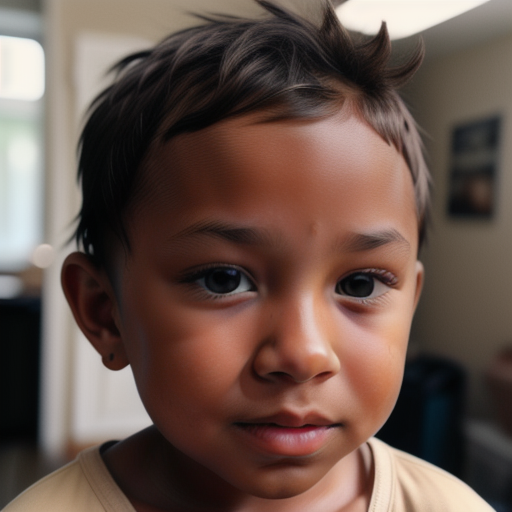

In [43]:
import cv2
import numpy as np
import torch
from PIL import Image

# Helper function to detect skin brightness automatically
def analyze_skin_tone(image_path, face_result):
    # Load image
    if isinstance(image_path, str):
        img_arr = cv2.imread(image_path)
    else:
        img_arr = cv2.cvtColor(np.array(image_path), cv2.COLOR_RGB2BGR)

    if face_result is None or img_arr is None:
        return 255  # Default to white if fails

    # Get bounding box of the face
    bbox = face_result.bbox.astype(int)
    x1, y1, x2, y2 = bbox[0], bbox[1], bbox[2], bbox[3]

    # Crop to the face
    face_crop = img_arr[y1:y2, x1:x2]

    # If crop failed, return default
    if face_crop.size == 0: return 150

    # Convert to LAB color space (L = Lightness, A/B = Color)
    # L ranges from 0 (Black) to 255 (White)
    lab_face = cv2.cvtColor(face_crop, cv2.COLOR_BGR2LAB)
    l_channel = lab_face[:, :, 0]

    # Calculate average lightness
    avg_lightness = np.mean(l_channel)
    return avg_lightness

def get_skin_description(lightness_score):
    # These thresholds map the 0-255 Lightness score to text
    if lightness_score < 60: return "dark ebony skin"
    if lightness_score < 100: return "dark brown skin"
    if lightness_score < 140: return "medium brown skin"
    if lightness_score < 170: return "light brown skin, tan"
    if lightness_score < 200: return "fair skin"
    return "pale skin"

def generate_baby_auto(father_url, mother_url, gender="child", steps=30, scale=0.7):
    print("--- STEP 1: LOADING IMAGES ---")
    image_f = load_image(father_url)
    image_m = load_image(mother_url)

    # Convert to CV2 for InsightFace
    cv_img_f = cv2.cvtColor(np.array(image_f), cv2.COLOR_RGB2BGR)
    cv_img_m = cv2.cvtColor(np.array(image_m), cv2.COLOR_RGB2BGR)

    print("--- STEP 2: ANALYZING FACES ---")
    faces_f = app.get(cv_img_f)
    faces_m = app.get(cv_img_m)

    if len(faces_f) == 0 or len(faces_m) == 0:
        print("❌ Error: Faces not detected.")
        return None

    # --- AUTO-DETECT SKIN TONE ---
    # We pass the image path if local, or the cv object
    l_score_dad = analyze_skin_tone(cv_img_f, faces_f[0])
    l_score_mom = analyze_skin_tone(cv_img_m, faces_m[0])

    # Average the parents' skin tone
    baby_lightness = (l_score_dad + l_score_mom) / 2
    skin_prompt = get_skin_description(baby_lightness)

    print(f"   > Dad Lightness Score: {l_score_dad:.1f}")
    print(f"   > Mom Lightness Score: {l_score_mom:.1f}")
    print(f"   > Calculated Baby Score: {baby_lightness:.1f}")
    print(f"   > Auto-selected Skin Tag: '{skin_prompt}'")
    # -----------------------------

    # Embeddings (Structure)
    embed_f = torch.tensor(faces_f[0].normed_embedding).unsqueeze(0).unsqueeze(0)
    embed_m = torch.tensor(faces_m[0].normed_embedding).unsqueeze(0).unsqueeze(0)

    baby_embeds = (embed_f + embed_m) / 2
    baby_embeds = baby_embeds.to("cuda", dtype=torch.float16)

    # Stack negative embeds
    neg_baby_embeds = torch.zeros_like(baby_embeds)
    combined_embeds = torch.cat([neg_baby_embeds, baby_embeds], dim=0)

    print("--- STEP 3: GENERATING ---")
    # We inject the auto-detected skin prompt here
    prompt = (
        f"raw candid photo of a {gender}, {skin_prompt}, "
        f"shot on iPhone, slightly imperfect, natural skin texture, "
        f"slight film grain, fujifilm, hyperrealistic"
    )
    print(f"   > Full Prompt: {prompt}")

    pipe.set_ip_adapter_scale(scale)

    image = pipe(
        prompt,
        neg_prompt = (
        "nude, shirtless, blurry, ugly, deformed, cartoon, anime, 3d render, cgi, plastic, waxy skin, airbrushed, makeup, lipstick, studio lighting, glossy, photoshop, smooth skin, doll, acne, mole, warts, pimples, skin bumps, rough skin, texture, "),
        ip_adapter_image_embeds=[combined_embeds],
        num_inference_steps=steps,
        width=512,
        height=512,
        guidance_scale=7.5
    ).images[0]

    return image

# --- EXECUTION ---
father_img = "/content/profilePic (1).png"
mother_img = "/content/babyMom.png"

# No manually added ethnicity here. It figures it out.
result = generate_baby_auto(father_img, mother_img, gender="baby boy")
display(result)